# Chapter 5

Problems 1, 2, 3, 4, 5, 6, 8

## Problem 1

![alttext](img/p1.png)

**state relevant property of variance**

Recall $$ \operatorname { Var } ( a X + b Y ) = a ^ { 2 } \operatorname { Var } ( X ) + b ^ { 2 } \operatorname { Var } ( Y ) + 2 a b \operatorname { Cov } ( X , Y )$$.

**substitute problem specific variables (note the degree of the variable of interest to optimize)**

So, $$ \operatorname { Var } ( \alpha X + ( 1 - \alpha ) Y ) = \\ \alpha ^ { 2 } \operatorname { Var } ( X ) + ( 1 - \alpha ) ^ { 2 } \operatorname { Var } ( Y ) + 2 \alpha ( 1 - \alpha ) \operatorname { Cov } ( X , Y ) = \\ \sigma _ { X } ^ { 2 } \alpha ^ { 2 } + \sigma _ { Y } ^ { 2 } ( 1 - \alpha ) ^ { 2 } + 2 \sigma _ { X Y } \left( - \alpha ^ { 2 } + \alpha \right) = \\ f(\alpha)\\ $$.

**simplify until 0 is on one side of expression, and we have expression of $n \times x^{n-1}$ where x is variable of interest to maximize and n is degree of the variable of interest to optimize)**

We have the following critical point,
$$
f'(\alpha) = 0 \implies \\
2 \sigma _ { X } ^ { 2 } \alpha + 2 \sigma _ { Y } ^ { 2 } ( 1 - \alpha ) ( - 1 ) + 2 \sigma _ { X Y } ( - 2 \alpha + 1 ) = 0 \implies \dots \\
$$

**target proposition**

$$
\alpha = \frac { \sigma _ { Y } ^ { 2 } - \sigma _ { X Y } } { \sigma _ { X } ^ { 2 } + \sigma _ { Y } ^ { 2 } - 2 \sigma _ { X Y } }
$$.

To see that it's a minimum, note that $ f' ( \alpha + \epsilon) > 0, f' ( \alpha - \epsilon) < 0$.

## Problem 2

![alttext](img/p2.png)
![alttext](img/p2b.png)

#### (a-c)

Note that
$$P(\text{for a single random draw, } x_i \in \text{ bootstrap sample}) = ( \frac{1}{n} )$$.
What is the intuition for this?  If our population is 1, the bootstrap sample will *have* to have that data point.



**simplify and interpret**

Negating that, we have
$$P(\text{for a single random draw, } x_i \notin \text{ bootstrap sample}) = ( 1 - \frac{1}{n} )$$.

Since taking a bootstrap sample amounts to taking $n$ *independent* draws...

**target proposition**

$P(x_i \notin \text{ bootstrap sample}) = ( 1 - \frac{1}{n} ^ { n })$

#### (d)

$1 - ( 4 / 5 ) ^ { 5 } = 67.2 \%$

#### (e)
$1 - ( 99 / 100 ) ^ { 100 } = 63.4 \%$

#### (f)
$1 - ( 1 - 1 / 10000 ) ^ { 10000 } = 63.2 \%$

## Problem 3

![alttext](img/p3.png)

#### (a)
In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation.
- (k-1) * k models trained
- k validation errors
- test error is estimated by averaging the k validation errors

#### (b)
- (i) large variation in test error
- (ii) has higher variance than cross validation

## Problem 4

![alttext](img/p4.png)

Use bootstrapping

## Problem 5

![alttext](img/p5.png)
![alttext](img/p5b.png)

#### (a)

In [1]:
library(ISLR)
data <- Default
head(data)

default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


In [4]:
set.seed(9001)
model = glm(
    default ~ income + balance,
    data = data,
    family = binomial
)

#### (b - c)

In [27]:
train = sample(
    dim(data)[1], # dataset to sample from
    dim(data)[1]/2 # number of sample to draw
)

In [29]:
model = glm(
    default ~ income + balance,
    data = data,
    family = binomial, 
    subset = train
)

In [31]:
# initialize predictions
y_hat = rep("No", dim(data)[1]/2) # 50% validation set

In [35]:
probs = predict(
    model,
    data[-train, ],
    type = "response"
)

In [36]:
y_hat[probs > 0.5] = "Yes"

In [39]:
mean(
    y_hat != data[-train, ]$default
)

[1] 0.0258

#### (d)

In [50]:
train = sample(
    dim(data)[1], # dataset to sample from
    dim(data)[1]/2 # number of sample to draw
)

model = glm(
    default ~ income + balance + student,
    data = data,
    family = binomial, 
    subset = train
)

y_hat = rep("No", dim(data)[1]/2)

probs = predict(
    model,
    data[-train, ],
    type = "response"
)

y_hat[probs > 0.5] = "Yes"

mean(
    y_hat != data[-train, ]$default
)

[1] 0.0274

Has generally higher test error

## Problem 6

![alttext](img/p6.png)
![alttext](img/p6b.png)

In [51]:
data <- Default

#### (a)

In [52]:
set.seed(9001)
model = glm(
    default ~ income + balance,
    data = data,
    family = binomial
)
summary(model)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


#### (b)

In [53]:
boot.fn = function(data, index) {
    return(
        coef(
            glm(default ~ income + balance, 
            data = data,
            family = binomial,
            subset = index
           )
        )
    )
}

#### (c)

In [54]:
library(boot)
boot(
    data,
    boot.fn,
    50
)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -9.107318e-02 5.383948e-01
t2*  2.080898e-05  3.916651e-07 5.569570e-06
t3*  5.647103e-03  5.288946e-05 2.712006e-04

## Problem 8

#### (a)

In [84]:
set.seed(9002)
y=rnorm(100)
x=rnorm(100)
y=x-2*x^2+rnorm(100)

n = 100 samples, p = 2 predictors (x, x^2)

#### (b)

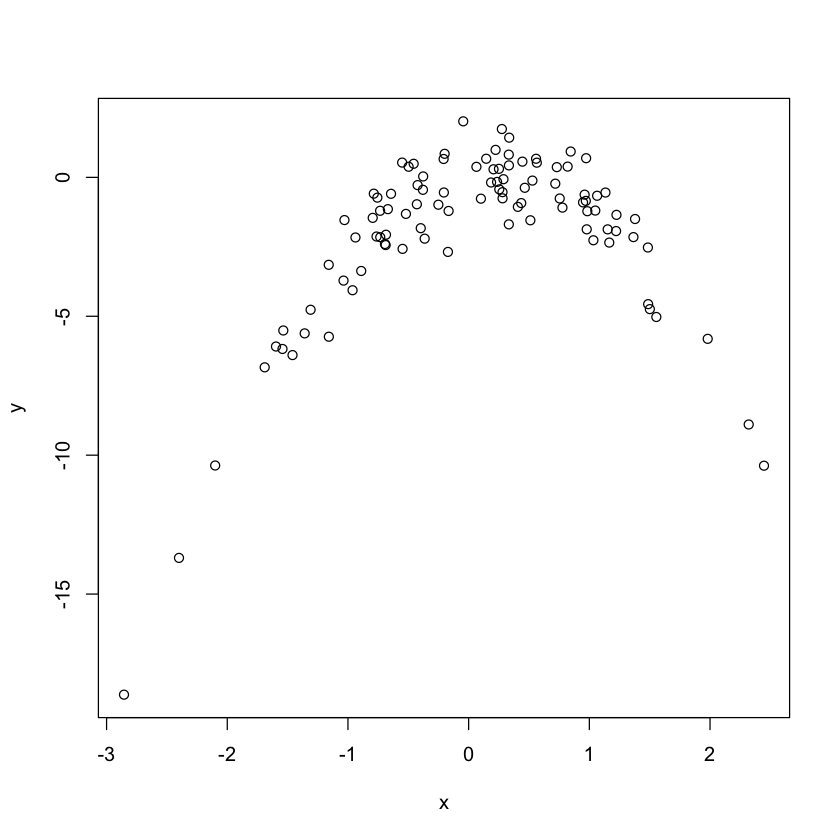

In [85]:
plot(x, y)

#### (c)

In [94]:
data = data.frame(x, y)

model = glm(
    y ~ x,
    data = data
)
cv.glm(
    data,
    model
)$delta

summary(model)

[1] 11.61670 11.61099


Call:
glm(formula = y ~ x, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-13.224   -1.325    1.110    2.131    3.725  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.1902     0.3282  -6.674  1.5e-09 ***
x             0.5778     0.3080   1.876   0.0637 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 10.72476)

    Null deviance: 1088.8  on 99  degrees of freedom
Residual deviance: 1051.0  on 98  degrees of freedom
AIC: 525.02

Number of Fisher Scoring iterations: 2


In [95]:
data = data.frame(x, y)

model = glm(
    y ~ poly(x, 2),
    data = data
)
cv.glm(
    data,
    model
)$delta

summary(model)

[1] 0.9297518 0.9294339


Call:
glm(formula = y ~ poly(x, 2), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6251  -0.6165   0.1017   0.5825   3.1148  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.15072    0.09462 -22.729  < 2e-16 ***
poly(x, 2)1   6.14295    0.94623   6.492 3.61e-09 ***
poly(x, 2)2 -31.05120    0.94623 -32.816  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.8953582)

    Null deviance: 1088.76  on 99  degrees of freedom
Residual deviance:   86.85  on 97  degrees of freedom
AIC: 277.69

Number of Fisher Scoring iterations: 2


In [96]:
data = data.frame(x, y)

model = glm(
    y ~ poly(x, 3),
    data = data
)
cv.glm(
    data,
    model
)$delta

summary(model)

[1] 0.9503101 0.9498756


Call:
glm(formula = y ~ poly(x, 3), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6241  -0.6218   0.1032   0.5731   3.1006  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.15072    0.09511 -22.613  < 2e-16 ***
poly(x, 3)1   6.14295    0.95109   6.459 4.34e-09 ***
poly(x, 3)2 -31.05120    0.95109 -32.648  < 2e-16 ***
poly(x, 3)3  -0.10063    0.95109  -0.106    0.916    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9045793)

    Null deviance: 1088.76  on 99  degrees of freedom
Residual deviance:   86.84  on 96  degrees of freedom
AIC: 279.68

Number of Fisher Scoring iterations: 2


In [97]:
data = data.frame(x, y)

model = glm(
    y ~ poly(x, 4),
    data = data
)
cv.glm(
    data,
    model
)$delta

summary(model)

[1] 0.9662441 0.9657178


Call:
glm(formula = y ~ poly(x, 4), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6375  -0.6287   0.1025   0.5802   3.0969  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.15072    0.09559 -22.499  < 2e-16 ***
poly(x, 4)1   6.14295    0.95594   6.426 5.19e-09 ***
poly(x, 4)2 -31.05120    0.95594 -32.483  < 2e-16 ***
poly(x, 4)3  -0.10063    0.95594  -0.105    0.916    
poly(x, 4)4   0.16515    0.95594   0.173    0.863    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9138141)

    Null deviance: 1088.763  on 99  degrees of freedom
Residual deviance:   86.812  on 95  degrees of freedom
AIC: 281.65

Number of Fisher Scoring iterations: 2


#### (d)

In [98]:
set.seed(9003)

y=rnorm(100)
x=rnorm(100)
y=x-2*x^2+rnorm(100)

data = data.frame(x, y)

model = glm(
    y ~ x,
    data = data
)
cv.glm(
    data,
    model
)$delta

data = data.frame(x, y)

model = glm(
    y ~ poly(x, 2),
    data = data
)
cv.glm(
    data,
    model
)$delta

data = data.frame(x, y)

model = glm(
    y ~ poly(x, 3),
    data = data
)
cv.glm(
    data,
    model
)$delta

data = data.frame(x, y)

model = glm(
    y ~ poly(x, 4),
    data = data
)
cv.glm(
    data,
    model
)$delta

summary(model)

[1] 11.61670 11.61099

[1] 0.9297518 0.9294339

[1] 0.9503101 0.9498756

[1] 0.9662441 0.9657178


Call:
glm(formula = y ~ poly(x, 4), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6375  -0.6287   0.1025   0.5802   3.0969  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.15072    0.09559 -22.499  < 2e-16 ***
poly(x, 4)1   6.14295    0.95594   6.426 5.19e-09 ***
poly(x, 4)2 -31.05120    0.95594 -32.483  < 2e-16 ***
poly(x, 4)3  -0.10063    0.95594  -0.105    0.916    
poly(x, 4)4   0.16515    0.95594   0.173    0.863    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9138141)

    Null deviance: 1088.763  on 99  degrees of freedom
Residual deviance:   86.812  on 95  degrees of freedom
AIC: 281.65

Number of Fisher Scoring iterations: 2


#### (e)

The quadratic model had the smallest error.  This is what you should expect - although the training error will be smaller for cubic and quartic, it won't generalize to validation sets as well.

#### (f)

The results about significance agree.